# Assignment 4 - Part 2

### Due Date: Friday, April 10th, 2020 @ 11pm



For this assignment you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 4 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

### Github & D2L Submissions
Please create a **private** github repo and submit your answers on both **private github** and on **D2L**. Please add me as collaborator to your github account: `nasimtaba`.

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

 Start by reading in the titanic.csv file into a pandas dataframe.

In [3]:
Titanic = pd.read_csv('titanic.csv')

In [4]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Hypothesis 1**
Determine if survival rate is associated with the class of a passenger

In [35]:
Total = Titanic.shape[0] # Total number od data points
Class = Titanic.groupby(['Survived','Pclass'])[['PassengerId']].count()
PercentClass = round((Class/Total),2)*100 # Show percentage of passangers in each category
PercentClass

PassengerId
Survived Pclass             
0        1               9.0
         2              11.0
         3              42.0
1        1              15.0
         2              10.0
         3              13.0

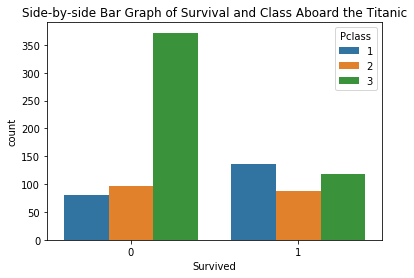

In [50]:
sns.countplot(x='Survived',hue='Pclass', data=Titanic)
plt.title('Side-by-side Bar Graph of Survival and Class Aboard the Titanic')
plt.savefig('HW4 - Hypothesis1.png')

## **Hypothesis 2**
Determine if survival rate is associatedd with the gender of a passenger

In [43]:
Gender = Titanic.groupby(['Survived','Sex'])[['PassengerId']].count()
round((Gender/Total),2)*100

PassengerId
Survived Sex                
0        female          9.0
         male           53.0
1        female         26.0
         male           12.0

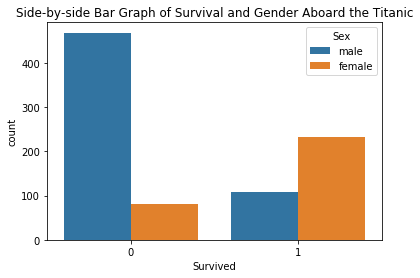

In [51]:
sns.countplot(x='Survived', hue='Sex',data=Titanic)
plt.title('Side-by-side Bar Graph of Survival and Gender Aboard the Titanic')
plt.savefig('HW4 - Hypothesis2.png')

## **Hypothesis 3**
Determine if survival rate is associated with the age of a Passenger

In [104]:
Titanic['Age'].dropna().shape

(714,)

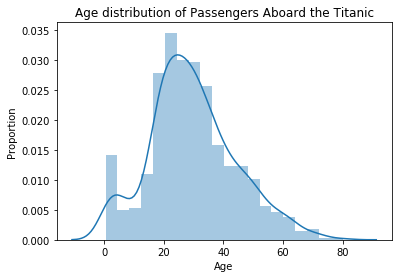

In [64]:
sns.distplot(Titanic['Age'].dropna())
plt.ylabel('Proportion')
plt.title('Age distribution of Passengers Aboard the Titanic')
plt.savefig('HW4 - Age Histogram.png')

In [79]:
Age = Titanic.groupby('Survived')[['Age']].describe()
Age

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0

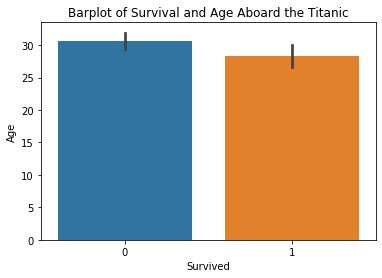

In [109]:
sns.barplot(x='Survived', y ='Age', data=Titanic)
plt.title('Barplot of Survival and Age Aboard the Titanic')
plt.savefig('HW4 - Hypothesis3 Barplot.png')

In [100]:
#Create new df for the age distribution for each survival category
Died = Titanic[Titanic['Survived']==0][['Age']]
Survived = Titanic[Titanic['Survived']==1][['Age']]

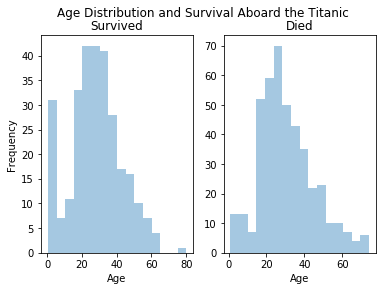

In [110]:
plt.subplot(1,2,1)
sns.distplot(Survived.dropna(),kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survived')

plt.subplot(1,2,2)
sns.distplot(Died.dropna(),kde=False)
plt.xlabel('Age')
plt.title('Died')

plt.suptitle('Age Distribution and Survival Aboard the Titanic')
plt.savefig('HW4 - Hypothesis3 Age_Comparison.png')